# Ch04 SeqBootstrap(Random)

In [24]:
import numpy as np 
import pandas as pd 

import matplotlib as mpl
import matplotlib.pyplot as plt

import datetime as dt
from adv_finance import bars, labeling, utils, sampling, multiprocess

from tqdm import tqdm
from scipy.sparse import csr_matrix

import matplotlib.pylab as plt
import scipy.sparse as sparse



In [25]:
%load_ext autoreload 
%autoreload 2

plt.style.use('seaborn-talk')
plt.style.use('bmh')
pd.set_option('display.max_rows', 100)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
def get_rnd_t1(num_obs, num_bars, max_h):
    t1 = pd.Series()
    for i in np.arange(num_obs):
        ix = np.random.randint(0, num_bars)
        val = ix + np.random.randint(1, max_h)
        t1.loc[ix] = val
    return t1.sort_index()


def auxMC(num_obs, num_bars, max_h):
    t1 = get_rnd_t1(num_obs, num_bars, max_h)
    bar_idx = range(t1.max() + 1)

    ind_m = sampling.get_ind_matrix(bar_idx, t1, verbose=False)
    phi = sampling.seq_bootstrap(ind_m, verbose=False)
    seq_u = sampling.get_avg_uniqueness(ind_m[:, phi], None).mean()
    phi = np.random.choice(np.arange(ind_m.shape[1]), size=ind_m.shape[1])
    std_u = sampling.get_avg_uniqueness(ind_m[:, phi], None).mean()

    return {'std_u': std_u, 'seq_u': seq_u}


def mainMC(num_obs=10, num_bars=100, max_h=5, num_iters=5, num_threads=1):
    jobs = []
    for i in np.arange(num_iters):
        job = {'func': auxMC, 'num_obs': num_obs, 'num_bars': num_bars, 'max_h': max_h}
        jobs.append(job)

    if num_threads == 1:
        out = multiprocess.process_jobs_(jobs)
    else:
        out = multiprocess.process_jobs(jobs, num_threads)

    return pd.DataFrame(out)


In [35]:
%%time
import warnings 
warnings.filterwarnings('ignore')

df = mainMC(num_obs=10, num_bars=100, num_iters=10000, num_threads=16)

CPU times: user 3.39 s, sys: 924 ms, total: 4.31 s
Wall time: 1min 9s


2019-05-29 07:49:07.423970 100.0 16 done after 1.15 minutes. Remaining 0.0 minutes.


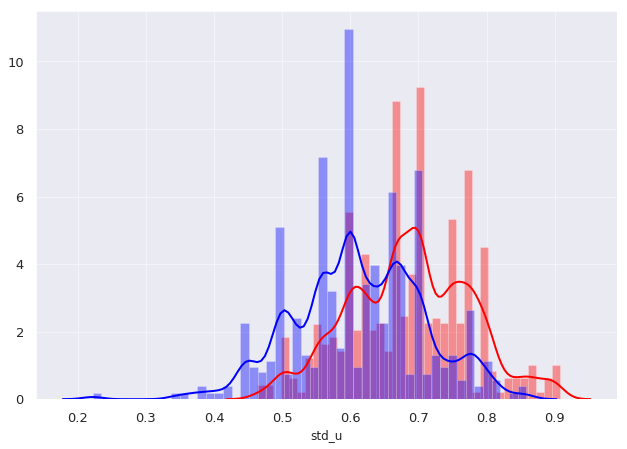

In [37]:
import seaborn as sns 

sns.set_style('darkgrid')
sns.distplot(df['seq_u'], color='red')
sns.distplot(df['std_u'], color='blue')